# Libraries used
PV --> Running 3.10.10
Running Kernel3.9.13 base anaconda

#perform al pip installs in one go comment out if already installed
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install scipy
!pip install statsmodels
!pip install plotly
!pip install cufflinks
!pip install squarify
!pip install yellowbrick
!pip install lazypredict
!pip install pandas_profiling

In [77]:
!pip install 

ERROR: You must give at least one requirement to install (see "pip help install")


In [78]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.io as pio
#import squarify #treemap
import os
import matplotlib
import warnings

from imblearn.over_sampling import SMOTE


#to enable the inline plotting
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")

In [79]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [80]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


from scipy.stats import normaltest

from pandas_profiling import ProfileReport

from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette

import lazypredict
from lazypredict.Supervised import LazyClassifier

warnings.simplefilter(action='ignore', category=FutureWarning)

# Functions


In [81]:
# Function for EDA. Using the display() function to have  well-formatted tables. We are mainly using pandas to explore the datasets

def dataset_description(df_target):

    print('This is the Dataset shape: %s\n' % (df_target.shape, ))
    print('Dataset columns: %s\n' % df_target.columns)

    print('\nColumns description:\n')
    display(df_target.info())
    display(df_target.describe())  # describe the dataset

    print('\nNull values:\n')
    display(df_target.isnull().sum())  # Identify null values

#function performing a quick check on df_inspection to have best of pandas functions separated by a line
def quick_check(dataframe):
    print('First 5 rows %s\n')
    print(dataframe.head(2))
    print("=====================================")
    print('Dataframe shape %s\n')
    print(dataframe.shape)
    print("=====================================")
    print('Dataframe describe categorical %s\n')
    print(dataframe.describe(include=['O']))
    print("=====================================")
    print('Dataframe null values %s\n')
    print(dataframe.isnull().sum())
    print("=====================================")
    print('Dataframe value counts %s\n')
    print(dataframe.value_counts())
    print("=====================================")

#stats function
def stats(dataframe):
    print('Dataframe correlation %s\n')
    print(dataframe.corr())
    print("=====================================")
    print('Dataframe covariance %s\n')
    print(dataframe.cov())
    print("=====================================")
    print('Dataframe skew %s\n')
    print(dataframe.skew())
    print("=====================================")
    print('Dataframe kurtosis %s\n')
    print(dataframe.kurt())
    print("=====================================")

#create a function to normalize characters from a dataset's column in Spanish
def normalize_characters(df, column):
    df[column] = df[column].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df[column] = df[column].str.lower()
    df[column] = df[column].str.replace('á', 'a')
    df[column] = df[column].str.replace('é', 'e')
    df[column] = df[column].str.replace('í', 'i')
    df[column] = df[column].str.replace('ó', 'o')
    df[column] = df[column].str.replace('ú', 'u')
    df[column] = df[column].str.replace('ñ', 'n')
    df[column] = df[column].str.replace('ü', 'u')
    df[column] = df[column].str.replace('ç', 'c')
    df[column] = df[column].str.replace('(', '')
    df[column] = df[column].str.replace(')', '')
    df[column] = df[column].str.replace('\'', '')
    df[column] = df[column].str.replace('´', '')
    df[column] = df[column].str.replace('`', '')
    df[column] = df[column].str.replace('’', '')
    return df

#create function to change detypes in64 to int32 in a df
def change_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
        elif df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
    return df

def outlier_function(df, col_name):
    """ this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively"""
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                        
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                    
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
        else:
            pass
    return lower_limit, upper_limit, outlier_count

In [82]:
#show all print outputs when using a function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#display all columns
pd.set_option('display.max_columns', None)


# 2. Data Collection and Understanding 

## Network file

The network.csv file contains a static picture of the gas pipeline network. Every row corresponds to a pipe and has a unique PipeId identifier. The table has 1.446.529 pipes. 

The columns describe relevant features of each pipe. The complete list is: 

PipeId - unique identifier for the pipe 

Province - Spanish province where the pipe is located 

Town - Town or city where the pipe is located 

YearBuilt - Year in which the pipe was built and installed 

Material - Material in which the pipe is built 

GasType - Type of gas that runs through the pipe 

Diameter - diameter of the pipe 

Length - Length of the pipe 

Pressure - Pressure of the gas that runs through the pipe (bar) 

NumConnections - Number of connections (external). 

NumConnectionsUnder - Number of connections (internal and buried) 

BoolBridle  - Whether the pipe is bridled (True) or welded (False) 

## Inspection file

MaintenanceId - unique identifier for the inspection operation 

InspectionYear - year in which the inspection took place 

InspectionDate - date in which the inspection took place 

MonthsLastRev - number of months elapsed since the last previous inspection. 

Severity - Severity of the damage found (1: most severe, 3: least severe) 

Incidence - Boolean whether an incident was found on the revision (1) or not (0). 

# Merging datasets

In [83]:
#point to the folder where the data is stored for Dominik
os.chdir(r"C:\Users\roser/Documents/GitHub/base/complementary_datasets")

# Loading inspection data
df_baseline = pd.read_csv('df_baseline.csv')



In [84]:
df_baseline.shape

(5446331, 29)

In [85]:
df_baseline_inc = df_baseline[df_baseline['Incidence']==1]

In [86]:
df_baseline_inc.shape

(7716, 29)

In [87]:
# Convert the Year column from float to integer
df_baseline['InspectionYear'] = df_baseline['InspectionYear'].astype(int)
df_baseline_inc['InspectionYear'] = df_baseline_inc['InspectionYear'].astype(int)
df_baseline['Incidence'] = df_baseline['Incidence'].astype(int)
df_baseline_inc['Incidence'] = df_baseline_inc['Incidence'].astype(int)

In [88]:
df_baseline_inc.head()

,PipeId,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm)
11706,35790261,2,1.00,2018,1.75,2.00,1,18.00,9.00,1,12,0,0.21,8.83,1.36,0.11,1,1,0,0,0,1,0,0.00,7713.41,0.02,0.55,111.20,56.75
15403,340505207,5,1.00,2012,0.76,14.00,1,21.60,22.00,1,1,0,1.33,29.10,0.03,0.03,0,1,0,0,0,1,0,0.04,2145.45,0.02,0.57,111.40,72.68
16421,26589392,2,1.00,2019,1.75,4.00,1,22.50,22.00,1,2,0,0.13,2.65,0.75,0.38,1,1,1,0,0,0,0,0.00,275.56,0.16,0.57,111.40,72.68
16486,26603126,2,1.00,2017,1.75,2.00,1,22.50,23.00,1,2,0,0.06,1.62,1.24,0.62,1,1,1,0,0,0,0,0.00,409.66,0.16,0.57,111.40,72.68
16496,26603164,2,1.00,2017,1.75,2.00,1,22.50,23.00,1,2,0,0.13,0.20,9.89,4.95,1,1,1,0,0,0,0,0.00,1.61,0.16,0.57,111.40,72.68


In [89]:
# Create a new column for the year
#df_baseline['year'] = df_baseline['InspectionYear'].dt.year

# Pivot the data by year and count the number of incidences in each year
count_by_year = df_baseline_inc.pivot_table(index='PipeId', columns='InspectionYear', values='Incidence', aggfunc='count')



In [90]:
count_by_year.fillna(0)

InspectionYear,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
PipeId,,,,,,,,,,,,
510311,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
634981,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
644491,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
828742,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
922679,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
450432110,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
450854018,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
450872858,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [91]:
# Rename the columns to include the year information
count_by_year.columns = ['incidences_{}'.format(col) for col in count_by_year.columns]

# Merge the pivoted table with the original dataframe
df_baseline4=pd.merge(df_baseline,count_by_year, left_on='PipeId', right_on='PipeId', how='outer')


In [92]:
df_baseline4.shape

(5446331, 41)

In [93]:
df_baseline4.fillna(0)

,PipeId,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm),incidences_2010,incidences_2011,incidences_2012,incidences_2013,incidences_2014,incidences_2015,incidences_2016,incidences_2017,incidences_2018,incidences_2019,incidences_2020,incidences_2021
0,489616,5,0.00,2013,0.00,1.00,1,21.40,16.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,489616,5,0.00,2015,0.00,3.00,1,21.40,22.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,489616,5,0.00,2016,0.00,4.00,1,21.40,22.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,489616,5,0.00,2018,0.00,6.00,1,21.40,23.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,489616,5,0.00,2020,0.00,8.00,1,21.40,24.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446326,412795512,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,0.55,0.00,0.00,0,1,0,0,0,1,0,0.00,7.70,16.00,0.57,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5446327,412796243,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,2.09,0.00,0.00,0,1,0,0,0,1,0,0.01,54.83,16.00,0.57,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5446328,412796261,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,2.33,0.00,0.00,0,1,0,0,0,1,0,0.01,68.05,16.00,0.57,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5446329,412796288,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,2.68,0.00,0.00,0,1,0,0,0,1,0,0.01,90.08,16.00,0.57,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [94]:
change_dtypes(df_baseline4)

,PipeId,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm),incidences_2010,incidences_2011,incidences_2012,incidences_2013,incidences_2014,incidences_2015,incidences_2016,incidences_2017,incidences_2018,incidences_2019,incidences_2020,incidences_2021
0,489616,5,0.00,2013,0.00,1.00,1,21.40,16.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,489616,5,0.00,2015,0.00,3.00,1,21.40,22.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,489616,5,0.00,2016,0.00,4.00,1,21.40,22.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,489616,5,0.00,2018,0.00,6.00,1,21.40,23.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,489616,5,0.00,2020,0.00,8.00,1,21.40,24.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446326,412795512,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,0.55,0.00,0.00,0,1,0,0,0,1,0,0.00,7.70,16.00,0.56,108.40,45.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5446327,412796243,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,2.09,0.00,0.00,0,1,0,0,0,1,0,0.01,54.83,16.00,0.56,108.40,45.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5446328,412796261,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,2.33,0.00,0.00,0,1,0,0,0,1,0,0.01,68.05,16.00,0.56,108.40,45.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5446329,412796288,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,2.68,0.00,0.00,0,1,0,0,0,1,0,0.01,90.08,16.00,0.56,108.40,45.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
df_baseline4.fillna(0)

,PipeId,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm),incidences_2010,incidences_2011,incidences_2012,incidences_2013,incidences_2014,incidences_2015,incidences_2016,incidences_2017,incidences_2018,incidences_2019,incidences_2020,incidences_2021
0,489616,5,0.00,2013,0.00,1.00,1,21.40,16.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,489616,5,0.00,2015,0.00,3.00,1,21.40,22.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,489616,5,0.00,2016,0.00,4.00,1,21.40,22.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,489616,5,0.00,2018,0.00,6.00,1,21.40,23.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,489616,5,0.00,2020,0.00,8.00,1,21.40,24.00,0,0,0,0.16,1.54,0.00,0.00,0,1,0,0,0,1,0,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5446326,412795512,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,0.55,0.00,0.00,0,1,0,0,0,1,0,0.00,7.70,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5446327,412796243,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,2.09,0.00,0.00,0,1,0,0,0,1,0,0.01,54.83,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5446328,412796261,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,2.33,0.00,0.00,0,1,0,0,0,1,0,0.01,68.05,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5446329,412796288,1,0.00,2014,0.00,3.00,1,24.00,24.00,0,0,0,0.02,2.68,0.00,0.00,0,1,0,0,0,1,0,0.01,90.08,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [96]:
last_incidence_by_id = df_baseline4.groupby('PipeId').apply(lambda x: x.sort_values('InspectionYear', ascending=False).iloc[0])

In [97]:
df_baseline5 = last_incidence_by_id.fillna(0)

In [98]:
df_baseline5.to_csv('df_baseline5.csv', index=False, header=True)


In [99]:
df_baseline5

,PipeId,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm),incidences_2010,incidences_2011,incidences_2012,incidences_2013,incidences_2014,incidences_2015,incidences_2016,incidences_2017,incidences_2018,incidences_2019,incidences_2020,incidences_2021
PipeId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489616,489616.00,5.00,0.00,2020.00,0.00,8.00,1.00,21.40,24.00,0.00,0.00,0.00,0.16,1.54,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489645,489645.00,5.00,0.00,2020.00,0.00,8.00,1.00,21.40,24.00,0.00,0.00,0.00,0.22,0.59,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,4.33,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489780,489780.00,5.00,0.00,2020.00,0.00,11.00,1.00,23.00,24.00,0.00,0.00,0.00,0.02,2.59,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,56.03,25.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489790,489790.00,5.00,0.00,2020.00,0.00,8.00,1.00,19.80,24.00,0.00,0.00,0.00,0.03,1.53,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,19.68,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489792,489792.00,5.00,0.00,2020.00,0.00,8.00,1.00,19.80,24.00,0.00,1.00,0.00,0.03,4.07,0.25,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,138.51,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451195391,451195391.00,4.00,0.00,2019.00,0.00,7.00,1.00,21.00,24.00,0.00,0.00,0.00,1.07,1.90,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.03,14.29,0.02,0.70,110.40,230.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
451195406,451195406.00,3.00,0.00,2017.00,0.00,5.00,1.00,20.00,24.00,0.00,0.00,0.00,1.07,0.41,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.03,0.68,0.02,0.70,110.40,230.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
451995254,451995254.00,3.00,0.00,2015.00,0.00,5.00,0.00,34.67,24.00,0.00,0.00,0.00,0.60,0.03,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,0.01,0.02,0.59,112.40,36.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Undersampling

In [100]:
#count values for Incidence
df_baseline5['Incidence'].value_counts()

0.00    1225583
1.00       1804
Name: Incidence, dtype: int64

In [101]:
df_baseline6 = df_baseline5.copy()

In [102]:
df_baseline6.head()

,PipeId,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm),incidences_2010,incidences_2011,incidences_2012,incidences_2013,incidences_2014,incidences_2015,incidences_2016,incidences_2017,incidences_2018,incidences_2019,incidences_2020,incidences_2021
PipeId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489616,489616.00,5.00,0.00,2020.00,0.00,8.00,1.00,21.40,24.00,0.00,0.00,0.00,0.16,1.54,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489645,489645.00,5.00,0.00,2020.00,0.00,8.00,1.00,21.40,24.00,0.00,0.00,0.00,0.22,0.59,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,4.33,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489780,489780.00,5.00,0.00,2020.00,0.00,11.00,1.00,23.00,24.00,0.00,0.00,0.00,0.02,2.59,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,56.03,25.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489790,489790.00,5.00,0.00,2020.00,0.00,8.00,1.00,19.80,24.00,0.00,0.00,0.00,0.03,1.53,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,19.68,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489792,489792.00,5.00,0.00,2020.00,0.00,8.00,1.00,19.80,24.00,0.00,1.00,0.00,0.03,4.07,0.25,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,138.51,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [103]:
#undersampling the dataset
df_baseline_undersampling = df_baseline6.groupby('Incidence').apply(lambda x: x.sample(df_baseline5['Incidence'].value_counts().min(), random_state=42)).reset_index(drop=True)

df_baseline_undersampling['Incidence'].value_counts()

0.00    1804
1.00    1804
Name: Incidence, dtype: int64

# SMOTE to tackle the unbalanced dataset problem

In [104]:
#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence' and removing Incidence','MonthsLastRev','InspectionDay','PipeId', 'MaintenanceId', 'InspectionYear', 'InspectionDate',  'Province', 'Town', 'YearBuilt' for x
X = df_baseline6.drop(['PipeId'], axis=1)
y = df_baseline6['Incidence']
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_res.shape,y_res.shape

#create a pandas dataframe with the new balanced dataset
df_baseline_balanced6 = pd.DataFrame(X_res, columns=X.columns)
df_baseline_balanced6['Incidence'] = y_res
df_baseline_balanced6.head()

((2451166, 40), (2451166,))

,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm),incidences_2010,incidences_2011,incidences_2012,incidences_2013,incidences_2014,incidences_2015,incidences_2016,incidences_2017,incidences_2018,incidences_2019,incidences_2020,incidences_2021
0,5.00,0.00,2020.00,0.00,8.00,1.00,21.40,24.00,0.00,0.00,0.00,0.16,1.54,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,5.00,0.00,2020.00,0.00,8.00,1.00,21.40,24.00,0.00,0.00,0.00,0.22,0.59,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,4.33,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,5.00,0.00,2020.00,0.00,11.00,1.00,23.00,24.00,0.00,0.00,0.00,0.02,2.59,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,56.03,25.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,5.00,0.00,2020.00,0.00,8.00,1.00,19.80,24.00,0.00,0.00,0.00,0.03,1.53,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,19.68,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5.00,0.00,2020.00,0.00,8.00,1.00,19.80,24.00,0.00,1.00,0.00,0.03,4.07,0.25,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,138.51,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [105]:
#using SMOTE to balance the dataset creating a subset dataset with target y = 'Incidence'
X = df_baseline6.drop('Incidence', axis=1)
y = df_baseline6['Incidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

#count values for Incidence in y_train
y_train.value_counts()

0.00    980445
1.00    980445
Name: Incidence, dtype: int64

# Random classifier 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=42, verbose=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.9s finished


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    245138
         1.0       0.25      1.00      0.40       340

    accuracy                           1.00    245478
   macro avg       0.63      1.00      0.70    245478
weighted avg       1.00      1.00      1.00    245478

[[244119   1019]
 [     0    340]]
0.9958489151777349


<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion Matrix')

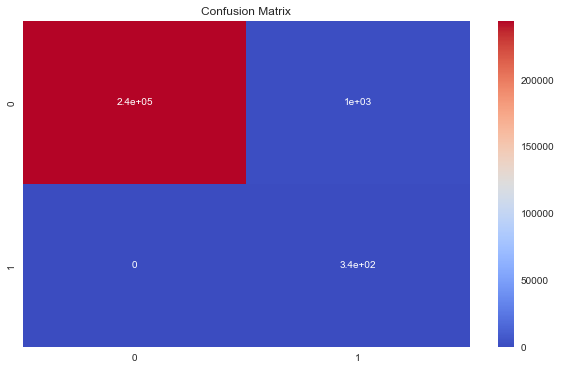

In [106]:
#random forest classifier with regularization and gridsearch to find the best parameters for the model
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth = 2, verbose=1)  
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

In [107]:
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


0.9958489151777349


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


In [108]:

#show classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    245138
         1.0       0.25      1.00      0.40       340

    accuracy                           1.00    245478
   macro avg       0.63      1.00      0.70    245478
weighted avg       1.00      1.00      1.00    245478



In [109]:
#use model to predict on test set
predictions = rfc.predict_proba(X_test)
predictions = predictions[:, 1]

#show accuracy score
print(accuracy_score(y_test, y_pred))


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


0.9958489151777349


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished


In [110]:
#import a file
os.chdir(r"C:\Users\roser/Documents/GitHub/base")
submission = pd.read_csv('sample_submission.csv')

In [111]:
submission.head(10)

,PipeId,Incidence
0,446859944,0
1,428124500,0
2,438428871,0
3,429034569,0
4,411184477,0
5,428837983,0
6,428837841,0
7,428838331,0
8,1200432,0
9,1200564,0


In [112]:
submission.shape

(909733, 2)

In [150]:
submission.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [128]:
df_baseline6.head()

,PipeId,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,Incidence,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm),incidences_2010,incidences_2011,incidences_2012,incidences_2013,incidences_2014,incidences_2015,incidences_2016,incidences_2017,incidences_2018,incidences_2019,incidences_2020,incidences_2021
PipeId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
489616,489616.00,5.00,0.00,2020.00,0.00,8.00,1.00,21.40,24.00,0.00,0.00,0.00,0.16,1.54,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,60.72,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489645,489645.00,5.00,0.00,2020.00,0.00,8.00,1.00,21.40,24.00,0.00,0.00,0.00,0.22,0.59,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,4.33,0.16,0.55,107.50,24.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489780,489780.00,5.00,0.00,2020.00,0.00,11.00,1.00,23.00,24.00,0.00,0.00,0.00,0.02,2.59,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,56.03,25.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489790,489790.00,5.00,0.00,2020.00,0.00,8.00,1.00,19.80,24.00,0.00,0.00,0.00,0.03,1.53,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,19.68,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
489792,489792.00,5.00,0.00,2020.00,0.00,8.00,1.00,19.80,24.00,0.00,1.00,0.00,0.03,4.07,0.25,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,138.51,16.00,0.56,108.40,45.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [131]:
df_baseline6.rename(columns = {'PipeId':'PipeId1'}, inplace = True)

In [134]:
#for all PipeId in submission, join  with df_baseline on PipeId
submission6 = pd.merge(submission, df_baseline6, left_on='PipeId', right_on='PipeId1', how='left').drop('PipeId1', axis=1)

In [137]:
submission6.shape

(909733, 42)

In [136]:
#missing values in submission2
submission6.isnull().sum()


PipeId                                           0
Incidence_x                                      0
No_Inspections                              136906
No_Incidents                                136906
InspectionYear                              136906
preventive_maintenance_rate                 136906
Age_pipe_at_inspection                      136906
pipe_inspected_frequently                   136906
Average_MonthsLastRev                       136906
MonthsLastRev                               136906
Incidence_y                                 136906
NumConnections                              136906
NumConnectionsUnder                         136906
Relative_Thickness                          136906
pipe_area                                   136906
area_connection                             136906
incidence_area                              136906
connection_bool                             136906
gas_natural                                 136906
Material_Acrylonitrile-Butadien

In [138]:
#fill all missing values in submission2 with 0
submission6.fillna(0, inplace=True)

In [116]:
#compute differences in PipeId between submission and submission2
np.setdiff1d(submission['PipeId'].unique(), submission3['PipeId'].unique())

array([], dtype=int64)

In [139]:
#drop Incidence_x and Incidence_y from submission2
submission6.drop(['Incidence_x', 'Incidence_y'], axis=1, inplace=True)

In [141]:
#make predictions for submission using the model
predictions = rfc.predict_proba(submission6)
predictions = predictions[:, 1]

#add predictions to submission
submission6['Incidence'] = predictions



#show submission
submission6.head(1)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.7s finished


,PipeId,No_Inspections,No_Incidents,InspectionYear,preventive_maintenance_rate,Age_pipe_at_inspection,pipe_inspected_frequently,Average_MonthsLastRev,MonthsLastRev,NumConnections,NumConnectionsUnder,Relative_Thickness,pipe_area,area_connection,incidence_area,connection_bool,gas_natural,Material_Acrylonitrile-Butadiene-Styrene,Material_Copper,Material_Fiberglass-Reinforced Plastic,Material_Polyethylene,Material_Polypropylene,Diameter2,Length2,Pressure2,Average year Humidity (%),Yearly Sun Hours (hours),Population density (persons/sqkm),incidences_2010,incidences_2011,incidences_2012,incidences_2013,incidences_2014,incidences_2015,incidences_2016,incidences_2017,incidences_2018,incidences_2019,incidences_2020,incidences_2021,Incidence
0,446859944,4.00,0.00,2019.00,0.00,7.00,1.00,20.75,23.00,0.00,0.00,0.73,15.30,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.01,1961.25,0.02,0.64,113.20,239.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07


In [144]:
kaggle_submission = submission6[['PipeId','Incidence']]

In [145]:
kaggle_submission.shape

(909733, 2)

In [ ]:
#drop all columns except PipeId and Incidence in submission2 creating kaggle_submission
kaggle_submission = submission6.drop(['No_Inspections', 'No_Incidents', 'InspectionYear',
       'preventive_maintenance_rate', 'Age_pipe_at_inspection',
       'pipe_inspected_frequently', 'Average_MonthsLastRev', 'MonthsLastRev',
       'NumConnections', 'NumConnectionsUnder', 'Relative_Thickness',
       'pipe_area', 'area_connection', 'incidence_area', 'connection_bool',
       'gas_natural', 'Material_Acrylonitrile-Butadiene-Styrene',
       'Material_Copper', 'Material_Fiberglass-Reinforced Plastic',
       'Material_Polyethylene', 'Material_Polypropylene', 'Diameter2',
       'Length2', 'Pressure2', 'Average year Humidity (%)',
       'Yearly Sun Hours (hours)', 'Population density (persons/sqkm)'], axis=1)

In [148]:

#show kaggle_submission
kaggle_submission.to_csv('kaggle_submission1.csv', index = False)
